In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

2022-12-19 21:03:15.448794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-19 21:03:16.826092: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-19 21:03:16.826125: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-19 21:03:19.163558: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

## Reading

In [3]:
df = pd.read_csv("oasis_longitudinal.csv")

### Set random state

In [4]:
RANDOM_STATE = 17

## EDA

In [5]:
# MR Delay
# after how many days visit based on first visit

# EDUC
# How many years educate

# SES
# Socioeconomic Status
# 5 means LOW and 1 means HIGH?

# MMSE
# Mini‐Mental State Examination

# CDR
# Clinical Dementia Rating

# eTIV
# Estimated total intracranial volume

# nWBV
# Normalize Whole Brain Volume

# ASF
# Atlas Scaling Factor

In [6]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [7]:
df.tail()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [9]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


## Preprocessing

### Handeling SES nan values 

<AxesSubplot: >

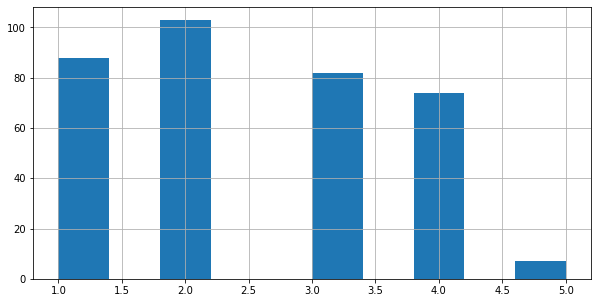

In [10]:
df.SES.hist(figsize = (10,5))

In [11]:
df.SES.mean()

2.4604519774011298

In [12]:
df.SES.unique()

array([ 2., nan,  3.,  4.,  1.,  5.])

In [13]:
df.groupby(["SES"]).mean()

/tmp/ipykernel_113115/2585948393.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["SES"]).mean()


,Visit,MR Delay,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF
SES,,,,,,,,,
1.0,2.011364,672.181818,77.829545,17.340909,27.602273,0.301136,1571.204545,0.716614,1.131739
2.0,1.815534,562.961165,76.679612,15.446602,28.067961,0.179612,1489.339806,0.735223,1.195087
3.0,1.865854,555.634146,77.243902,13.987805,27.573171,0.280488,1442.573171,0.741890,1.229829
4.0,1.864865,632.851351,76.243243,11.959459,26.378378,0.337838,1460.202703,0.725595,1.214378
5.0,1.714286,478.428571,78.142857,8.000000,24.285714,0.428571,1349.000000,0.722571,1.314429


In [14]:
# fill nan values function for SES
def fill_ses(x):
    ses = 0
    if x > 17:
        ses = 1.0
    elif (x < 17) and (x > 15):
        ses = 2.0
    elif (x < 15) and (x > 13):
        ses = 3.0
    elif (x < 13) and (x > 11):
        ses = 4.0
    else:
        ses = 5.0
    return ses

In [15]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [16]:
df["SES"] = df.apply(lambda x : fill_ses(x.EDUC) if pd.isna(x.SES)   else x.SES, axis = 1)

In [17]:
# convert float to int to use less memory
df["SES"] = df.SES.astype(int)

In [18]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,4,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,4,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,4,22.0,0.5,1698,0.701,1.034


### Handeling MMSE nan values 

<AxesSubplot: >

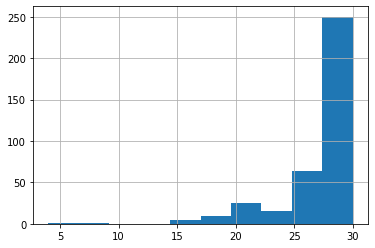

In [19]:
df.MMSE.hist()

In [20]:
df.groupby(["MMSE"]).mean()

/tmp/ipykernel_113115/685721936.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["MMSE"]).mean()


,Visit,MR Delay,Age,EDUC,SES,CDR,eTIV,nWBV,ASF
MMSE,,,,,,,,,
4.0,5.000000,1233.000000,69.000000,16.000000,1.000000,1.000000,1701.000000,0.676000,1.032000
7.0,4.000000,970.000000,68.000000,16.000000,1.000000,1.000000,1714.000000,0.682000,1.024000
15.0,2.000000,473.500000,73.500000,14.000000,3.500000,1.500000,1366.000000,0.689000,1.285500
16.0,2.333333,841.000000,73.666667,13.333333,3.666667,1.000000,1520.000000,0.705667,1.156000
17.0,1.800000,524.000000,70.000000,12.800000,3.200000,0.800000,1569.000000,0.701400,1.122600
18.0,2.500000,1023.000000,78.500000,10.000000,3.500000,0.750000,1471.500000,0.669500,1.193000
19.0,1.666667,215.666667,69.000000,14.666667,1.333333,1.000000,1560.333333,0.710000,1.146000
20.0,1.571429,372.857143,78.428571,13.285714,3.000000,0.714286,1555.000000,0.700429,1.138000
21.0,1.545455,315.636364,78.181818,14.181818,3.000000,0.909091,1439.000000,0.683727,1.232091


In [21]:
df["MMSE"].mean()

27.342318059299192

In [22]:
df["MMSE"].median()

29.0

In [23]:
df[df["MMSE"].isna()]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
357,OAS2_0181,OAS2_0181_MR2,Demented,2,539,F,R,75,12,4,NaN,1.0,1169,0.742,1.501
358,OAS2_0181,OAS2_0181_MR3,Demented,3,1107,F,R,77,12,4,NaN,1.0,1159,0.733,1.515


In [24]:
df[df["Group"] == "Demented"]["MMSE"].median()

26.0

In [25]:
df[df["MMSE"] < 26]["Group"].unique()

array(['Demented', 'Converted'], dtype=object)

In [26]:
df["MMSE"] = df.MMSE.fillna(df[df["Group"] == "Demented"]["MMSE"].median())

### Replace M/F values

In [27]:
df["M/F"] = np.where(df["M/F"] == "M", 1, 0)

### Drop Hand & MRI ID

In [28]:
df.drop(["Hand", "MRI ID"], axis = 1, inplace = True)

### Replace Group values

In [29]:
df["Group"] = np.where(df["Group"] == "Nondemented", 0, 1)

### Drop Subject ID

In [30]:
subject_id = df[["Subject ID"]]
df.drop(["Subject ID"], axis = 1, inplace = True)

## Processing

### Cut target column

In [31]:
y = df[["Group"]]
X = df.drop(["Group"], axis = 1)

### A list to remember and compare details

In [32]:
model_details = []

### Split Data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = RANDOM_STATE)

### Normalization

In [34]:
delay_scaler = MinMaxScaler()
age_scaler = MinMaxScaler()
educ_scaler = MinMaxScaler()
mmse_scaler = MinMaxScaler()
etiv_scaler = MinMaxScaler()

delay_scaler.fit(X_train["MR Delay"].to_numpy().reshape(-1,1))
age_scaler.fit(X_train["Age"].to_numpy().reshape(-1,1))
educ_scaler.fit(X_train["EDUC"].to_numpy().reshape(-1,1))
mmse_scaler.fit(X_train["MMSE"].to_numpy().reshape(-1,1))
etiv_scaler.fit(X_train["eTIV"].to_numpy().reshape(-1,1))

X_train["MR Delay"] = delay_scaler.transform(X_train["MR Delay"].to_numpy().reshape(-1,1))
X_train["Age"] = age_scaler.transform(X_train["Age"].to_numpy().reshape(-1,1))
X_train["EDUC"] = educ_scaler.transform(X_train["EDUC"].to_numpy().reshape(-1,1))
X_train["MMSE"] = mmse_scaler.transform(X_train["MMSE"].to_numpy().reshape(-1,1))
X_train["eTIV"] = etiv_scaler.transform(X_train["eTIV"].to_numpy().reshape(-1,1))

X_test["MR Delay"] = delay_scaler.transform(X_test["MR Delay"].to_numpy().reshape(-1,1))
X_test["Age"] = age_scaler.transform(X_test["Age"].to_numpy().reshape(-1,1))
X_test["EDUC"] = educ_scaler.transform(X_test["EDUC"].to_numpy().reshape(-1,1))
X_test["MMSE"] = mmse_scaler.transform(X_test["MMSE"].to_numpy().reshape(-1,1))
X_test["eTIV"] = etiv_scaler.transform(X_test["eTIV"].to_numpy().reshape(-1,1))

## Logestic Regression

/home/amyrmahdy/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

Non-Demanted       1.00      1.00      1.00        49
    Demanted       1.00      1.00      1.00        45

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94



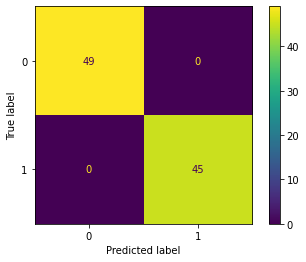

In [35]:
lr = LogisticRegression( max_iter = 1000)
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)
print(classification_report(y_test,lr_prediction, target_names= ["Non-Demanted", "Demanted"]))
lr_conf = confusion_matrix(y_test,lr_prediction)
model_details.append(["LogisticRegression", round(f1_score(y_test,lr_prediction, average = "weighted") * 100,4),lr_conf[1,0]])
lr_plot_conf = ConfusionMatrixDisplay(lr_conf)
lr_plot_conf.plot()

### RandomForest Classification


/tmp/ipykernel_113115/450862791.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


              precision    recall  f1-score   support

Non-Demanted       1.00      0.98      0.99        49
    Demanted       0.98      1.00      0.99        45

    accuracy                           0.99        94
   macro avg       0.99      0.99      0.99        94
weighted avg       0.99      0.99      0.99        94



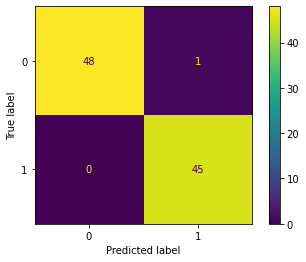

In [36]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)
print(classification_report(y_test,rfc_prediction, target_names= ["Non-Demanted", "Demanted"]))
rfc_conf = confusion_matrix(y_test,rfc_prediction)
model_details.append(["RandomForestClassifier", round(f1_score(y_test,rfc_prediction, average = "weighted") * 100,4),rfc_conf[1,0]])
rfc_plot_conf = ConfusionMatrixDisplay(rfc_conf)
rfc_plot_conf.plot()

### LinearSVC

              precision    recall  f1-score   support

Non-Demanted       1.00      1.00      1.00        49
    Demanted       1.00      1.00      1.00        45

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94



/home/amyrmahdy/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


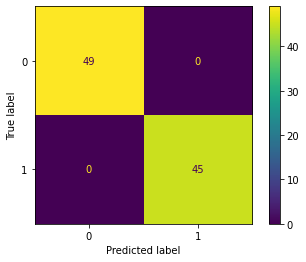

In [37]:
lsvc = LinearSVC(max_iter = 100000)
lsvc.fit(X_train, y_train)
lsvc_prediction = lsvc.predict(X_test)
print(classification_report(y_test,lsvc_prediction, target_names= ["Non-Demanted", "Demanted"]))
lsvc_conf = confusion_matrix(y_test,lsvc_prediction)
model_details.append(["LinearSVC", round(f1_score(y_test,lsvc_prediction, average = "weighted") * 100,4),lsvc_conf[1,0]])
lsvc_plot_conf = ConfusionMatrixDisplay(lsvc_conf)
lsvc_plot_conf.plot()

### Simple Neural Network

In [38]:
def build_snn():
    snn = tf.keras.Sequential()
    snn.add(tf.keras.layers.InputLayer(X_train.shape[1],))
    snn.add(tf.keras.layers.Dense(100,activation = "relu"))
    snn.add(tf.keras.layers.Dense(50,activation = "relu"))
    snn.add(tf.keras.layers.Dense(1,activation = "sigmoid"))
    snn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return snn

2022-12-19 21:03:33.538148: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-19 21:03:33.538180: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-19 21:03:33.538208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cando): /proc/driver/nvidia/version does not exist
2022-12-19 21:03:33.558824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
9/9 [==============================] - 2s 4ms/step - loss: 0.8060 - accuracy: 0.4946
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6377 - accuracy: 0.6953
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6095 - accuracy: 0.7670
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.8208
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5446 - accuracy: 0.8423
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.8638
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.8602
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.4396 - accuracy: 0.8710
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.3990 - accuracy: 0.9140
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3587 - accuracy: 0.9176
Epoch 11/100
9/9 [===========

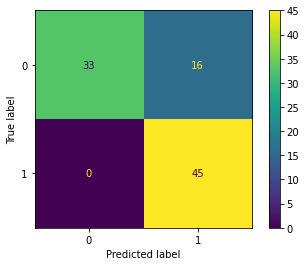

In [39]:
snn = build_snn()
snn.fit(X_train, y_train, epochs = 100)
not_final_snn_prediction = snn.predict(X_test)
snn_prediction = np.where(not_final_snn_prediction > 0.1, 1, 0)
print(classification_report(y_test,snn_prediction, target_names= ["Non-Demanted", "Demanted"]))
snn_conf = confusion_matrix(y_test,snn_prediction)
model_details.append(["SNN", round(f1_score(y_test,snn_prediction, average = "weighted") * 100,4),snn_conf[1,0]])
snn_plot_conf = ConfusionMatrixDisplay(snn_conf)
snn_plot_conf.plot()

### RNN LSTM

In [40]:
def build_lstm_rnn():
    lstm_rnn = tf.keras.Sequential()
    lstm_rnn.add(tf.keras.layers.LSTM(100, return_sequences = True,input_shape = (X_train.shape[1],1) ) )
    lstm_rnn.add(tf.keras.layers.LSTM(50,return_sequences = False))
    lstm_rnn.add(tf.keras.layers.Dense(1,activation = "sigmoid"))
    lstm_rnn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return lstm_rnn

Epoch 1/100
9/9 [==============================] - 6s 23ms/step - loss: 0.6957 - accuracy: 0.5018
Epoch 2/100
9/9 [==============================] - 0s 21ms/step - loss: 0.6926 - accuracy: 0.5269
Epoch 3/100
9/9 [==============================] - 0s 18ms/step - loss: 0.6919 - accuracy: 0.5054
Epoch 4/100
9/9 [==============================] - 0s 21ms/step - loss: 0.6921 - accuracy: 0.4803
Epoch 5/100
9/9 [==============================] - 0s 25ms/step - loss: 0.6901 - accuracy: 0.5699
Epoch 6/100
9/9 [==============================] - 0s 21ms/step - loss: 0.6885 - accuracy: 0.6416
Epoch 7/100
9/9 [==============================] - 0s 18ms/step - loss: 0.6872 - accuracy: 0.5806
Epoch 8/100
9/9 [==============================] - 0s 19ms/step - loss: 0.6824 - accuracy: 0.6129
Epoch 9/100
9/9 [==============================] - 0s 20ms/step - loss: 0.6752 - accuracy: 0.5914
Epoch 10/100
9/9 [==============================] - 0s 20ms/step - loss: 0.6722 - accuracy: 0.5484
Epoch 11/100
9/9 [=

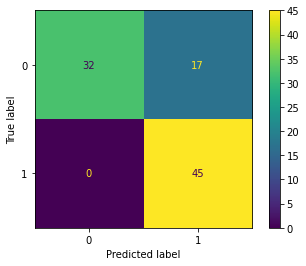

In [41]:
lstm_rnn = build_lstm_rnn()
lstm_rnn.fit(X_train, y_train, epochs = 100)
not_final_lstm_rnn_prediction = lstm_rnn.predict(X_test)
lstm_rnn_prediction = np.where(not_final_lstm_rnn_prediction > 0.1, 1, 0)
print(classification_report(y_test,lstm_rnn_prediction, target_names= ["Non-Demanted", "Demanted"]))
lstm_rnn_conf = confusion_matrix(y_test,lstm_rnn_prediction)
model_details.append(["LSTM RNN", round(f1_score(y_test,lstm_rnn_prediction, average = "weighted") * 100,4),lstm_rnn_conf[1,0]])
lstm_rnn_plot_conf = ConfusionMatrixDisplay(lstm_rnn_conf)
lstm_rnn_plot_conf.plot()

### RNN GRU

In [42]:
def build_gru_rnn():
    gru_rnn = tf.keras.Sequential()
    gru_rnn.add(tf.keras.layers.GRU(100, return_sequences = True,input_shape = (X_train.shape[1],1) ) )
    gru_rnn.add(tf.keras.layers.GRU(50,return_sequences = False))
    gru_rnn.add(tf.keras.layers.Dense(1,activation = "sigmoid"))
    gru_rnn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return gru_rnn

Epoch 1/100
9/9 [==============================] - 5s 15ms/step - loss: 0.6980 - accuracy: 0.5054
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.6944 - accuracy: 0.5018
Epoch 3/100
9/9 [==============================] - 0s 17ms/step - loss: 0.6910 - accuracy: 0.4946
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.4910
Epoch 5/100
9/9 [==============================] - 0s 22ms/step - loss: 0.6870 - accuracy: 0.5376
Epoch 6/100
9/9 [==============================] - 0s 20ms/step - loss: 0.6849 - accuracy: 0.5663
Epoch 7/100
9/9 [==============================] - 0s 18ms/step - loss: 0.6814 - accuracy: 0.5090
Epoch 8/100
9/9 [==============================] - 0s 19ms/step - loss: 0.6761 - accuracy: 0.6272
Epoch 9/100
9/9 [==============================] - 0s 20ms/step - loss: 0.6670 - accuracy: 0.6738
Epoch 10/100
9/9 [==============================] - 0s 20ms/step - loss: 0.6555 - accuracy: 0.6667
Epoch 11/100
9/9 [=

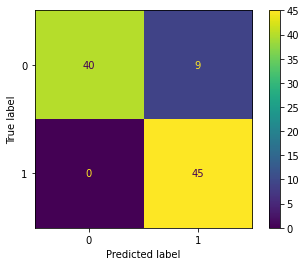

In [43]:
gru_rnn = build_gru_rnn()
gru_rnn.fit(X_train, y_train, epochs = 100)
not_final_gru_rnn_prediction = gru_rnn.predict(X_test)
gru_rnn_prediction = np.where(not_final_gru_rnn_prediction > 0.1, 1, 0)
print(classification_report(y_test,gru_rnn_prediction, target_names= ["Non-Demanted", "Demanted"]))
gru_rnn_conf = confusion_matrix(y_test,gru_rnn_prediction)
model_details.append(["GRU RNN", round(f1_score(y_test,gru_rnn_prediction, average = "weighted") * 100,4),gru_rnn_conf[1,0]])
gru_rnn_plot_conf = ConfusionMatrixDisplay(gru_rnn_conf)
gru_rnn_plot_conf.plot()

## Result

In [44]:
models = pd.DataFrame(model_details, columns = ["model","score","false_negatives"])
models = models.sort_values(["false_negatives"]).reset_index(drop = True)
models

,model,score,false_negatives
0,LogisticRegression,100.0000,0
1,RandomForestClassifier,98.9365,0
2,LinearSVC,100.0000,0
3,SNN,82.6027,0
4,LSTM RNN,81.4537,0
5,GRU RNN,90.3766,0


In [45]:
models.to_csv(f"details_random_state_{RANDOM_STATE}.csv", index = False)

In [46]:
# Author: amyrmahdy

# Date: 19 Dec 2022